**Author** : [Mochammad Arie Nugroho](https://github.com/arienugroho050396)

# <div align="center"> AIRLINE PASSENGER SATISFACTION </div>

## Import Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)


from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

## Read Dataset

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [4]:
df.describe()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,37493.270818,15.119360,997.452477,38.071126,38.465650,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,64940.500000,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,129880.000000,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [6]:
((df.shape[0] - df.dropna().shape[0]) / df.shape[0]) * 100

0.3025870033877425

In [7]:
#fill missing value with median 
df['Arrival Delay'].fillna(df['Arrival Delay'].median(),inplace=True)

In [8]:
#checking duplicated data
df.duplicated().sum()

0

In [9]:
#drop 'ID' column because is not necesary
df.drop(['ID'],axis=1)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied


## Data Understanding

In [10]:
categorical = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']
numerical = ['Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience',
              'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
              'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']

In [11]:
#show statistic of numerical column
df[numerical].describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [12]:
#show statistical summary for categorical column
df[categorical].describe()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
count,129880,129880,129880,129880,129880
unique,2,2,2,3,2
top,Female,Returning,Business,Business,Neutral or Dissatisfied
freq,65899,106100,89693,62160,73452


In [13]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [14]:
# Indicates the exact number of values
# this code is very useful because it has multiple categorical columns
for col in categorical:
    print (f'Value counts of {col} column')
    print(df[col].value_counts(), '\n')

Value counts of Gender column
Female    65899
Male      63981
Name: Gender, dtype: int64 

Value counts of Customer Type column
Returning     106100
First-time     23780
Name: Customer Type, dtype: int64 

Value counts of Type of Travel column
Business    89693
Personal    40187
Name: Type of Travel, dtype: int64 

Value counts of Class column
Business        62160
Economy         58309
Economy Plus     9411
Name: Class, dtype: int64 

Value counts of Satisfaction column
Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64 



## Univariate Analysis :

### Numeric Column

### 1. Show Outliers with Boxplot

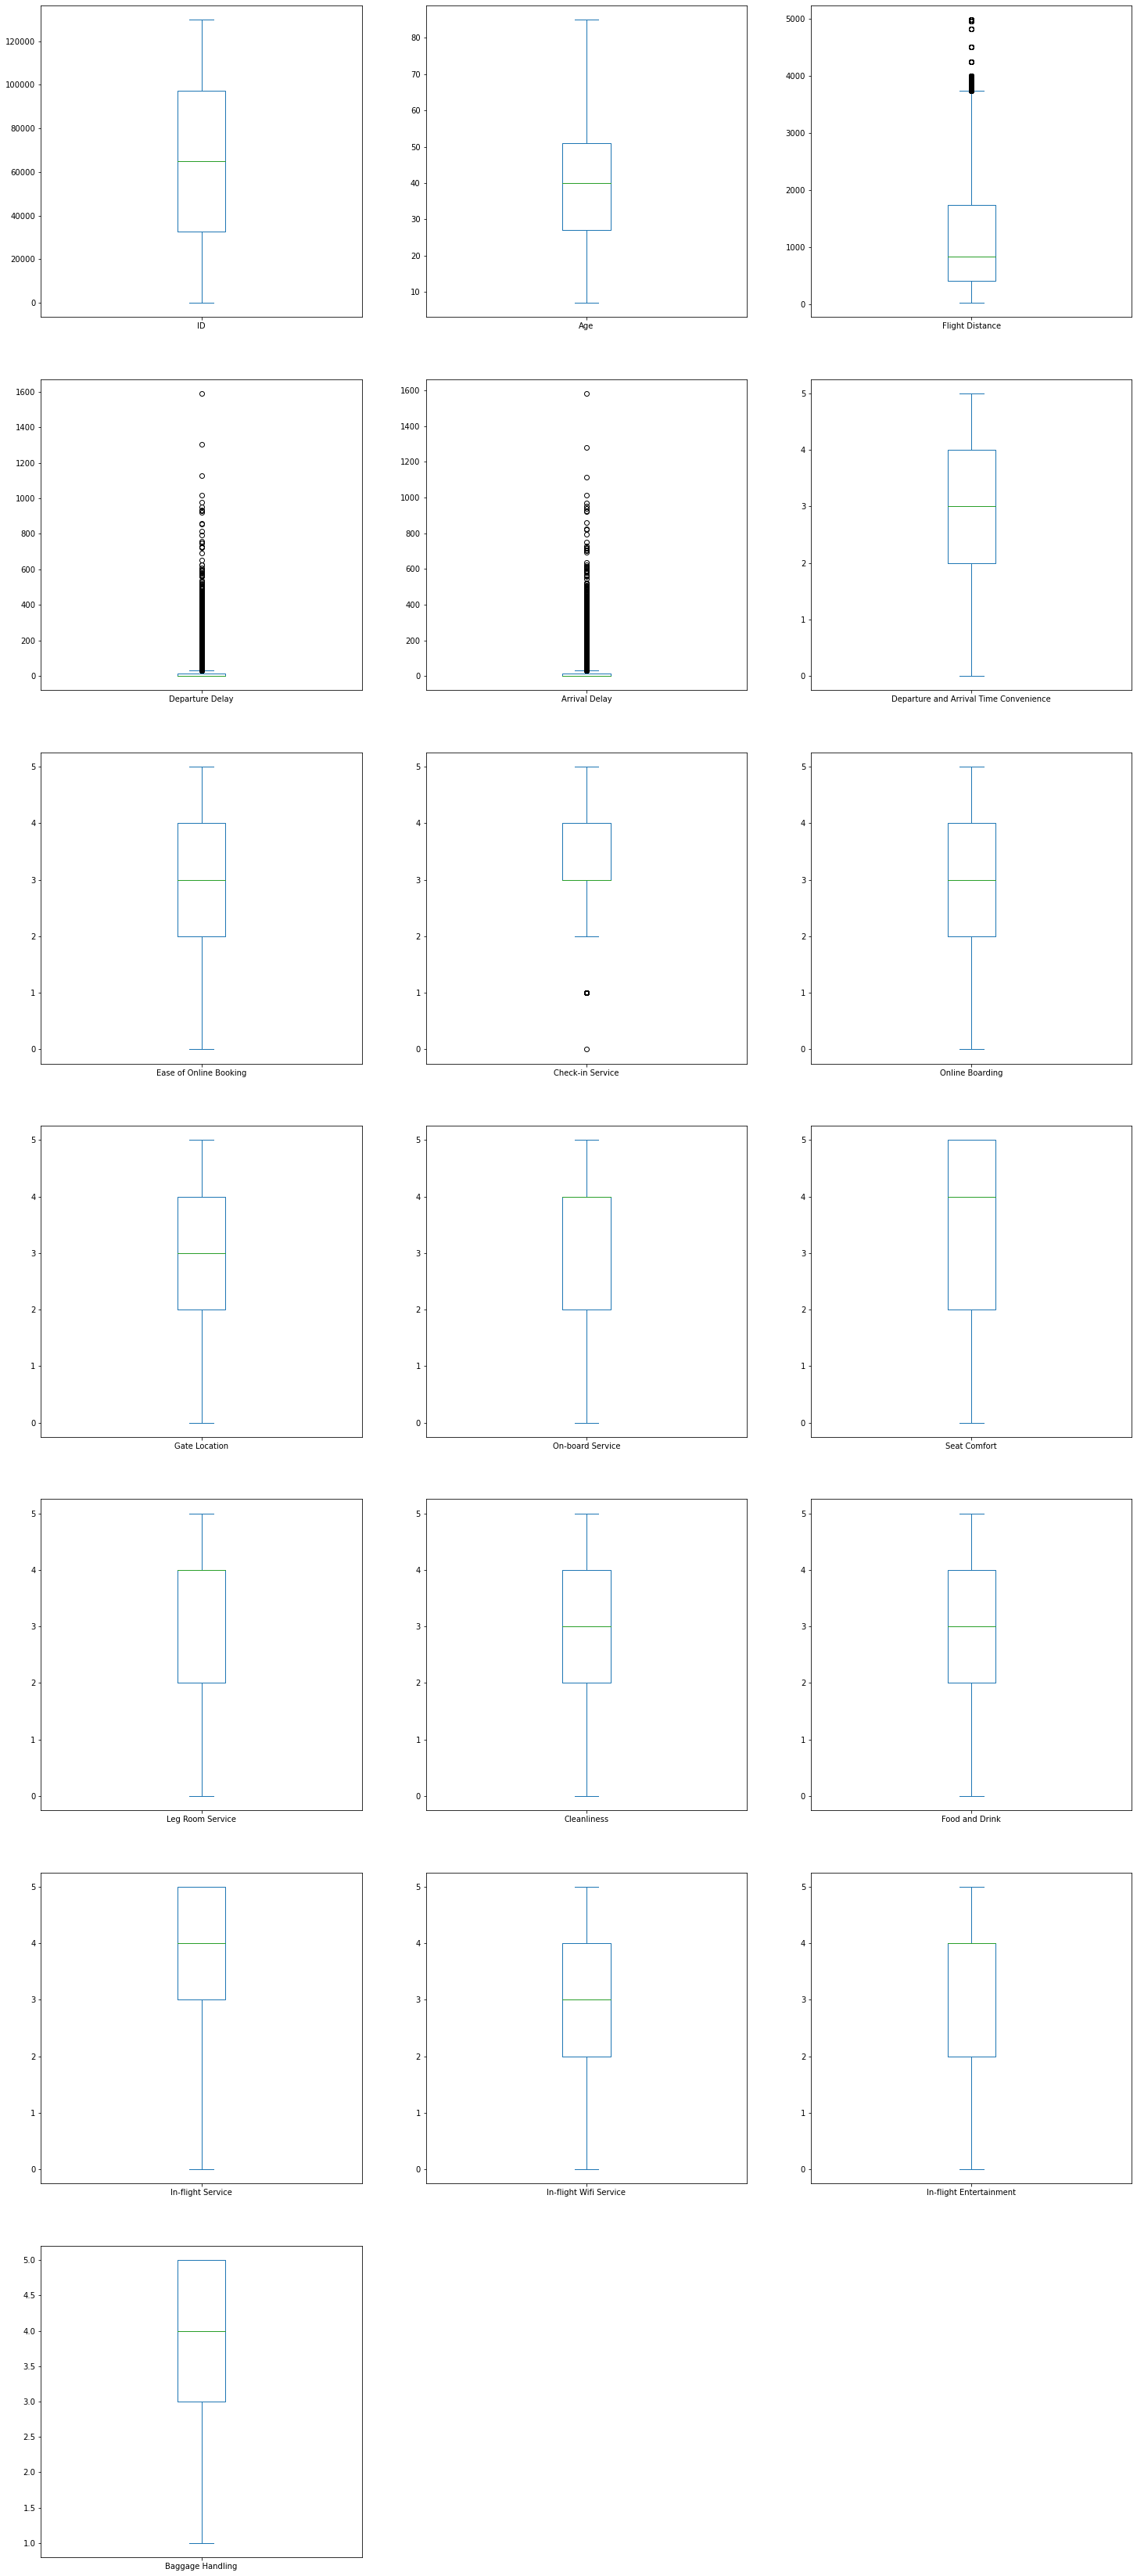

In [15]:
df.plot(kind = 'box', subplots = 1, layout = (7, 3), figsize = (25, 60))
plt.show()

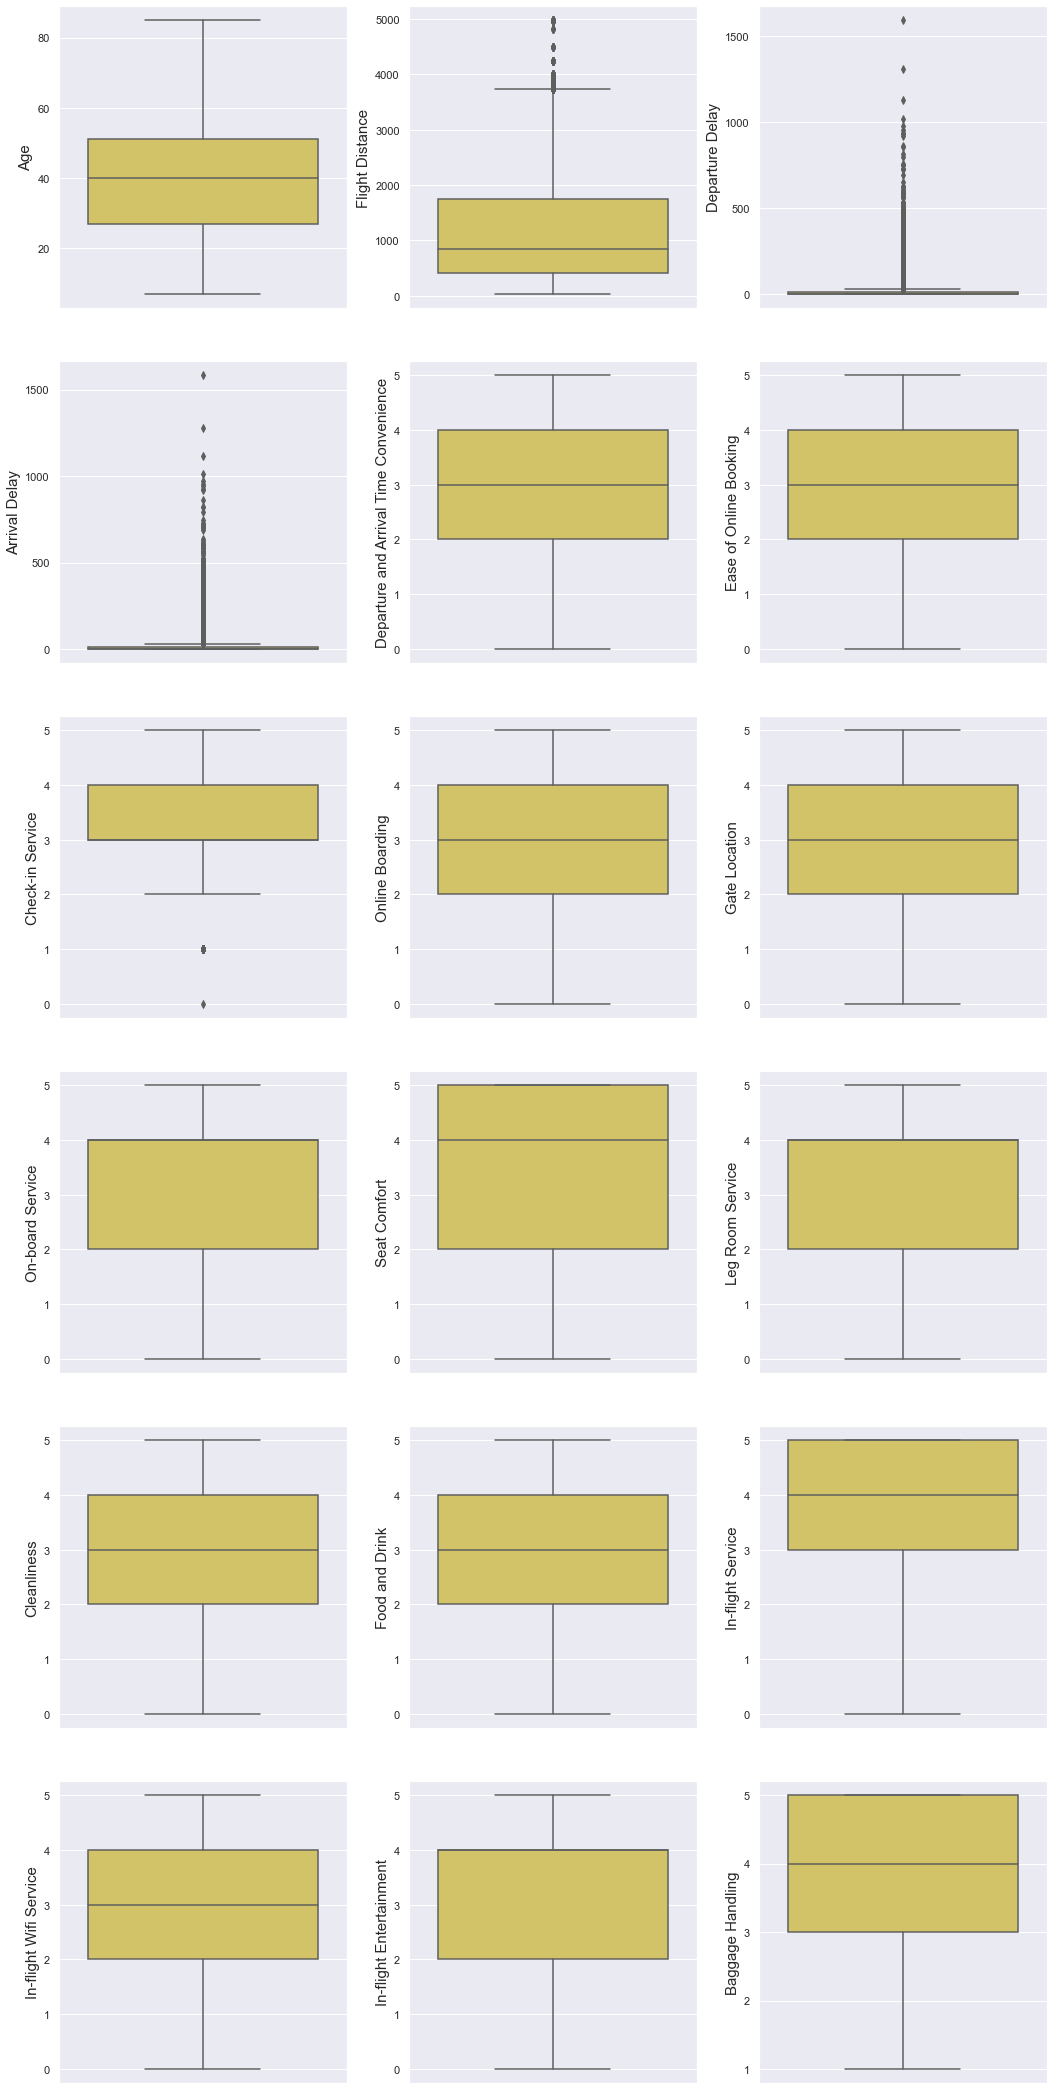

In [86]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

fig, axs = plt.subplots(6, 3, figsize=(15,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(numerical,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df,y=df[f],color='#E3CF57')

In [17]:
# show the profile of outlier 1
outlier1 = df['Flight Distance'].max()

df[df['Flight Distance'] == outlier1]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
31811,31812,Male,42,Returning,Business,Business,4983,0,0.0,3,3,4,4,3,5,4,4,4,5,2,3,4,3,Satisfied
31812,31813,Female,37,Returning,Business,Business,4983,0,2.0,3,2,4,4,2,1,4,5,4,4,3,2,3,1,Satisfied
31814,31815,Female,49,Returning,Business,Business,4983,0,14.0,1,1,4,4,1,5,4,2,4,4,4,4,2,3,Neutral or Dissatisfied
31815,31816,Female,45,Returning,Personal,Economy,4983,2,0.0,1,3,1,1,2,5,1,2,1,3,4,3,2,3,Neutral or Dissatisfied
31816,31817,Male,38,Returning,Business,Economy Plus,4983,2,0.0,4,4,4,4,4,4,4,3,4,4,5,4,3,5,Satisfied
31869,31870,Female,63,Returning,Personal,Business,4983,3,0.0,5,0,1,5,2,2,1,4,1,0,5,0,3,3,Satisfied
31870,31871,Female,50,Returning,Business,Business,4983,0,0.0,4,5,5,1,5,2,5,4,5,5,5,5,3,3,Satisfied
31871,31872,Male,46,Returning,Business,Business,4983,0,0.0,1,1,4,4,1,3,4,5,4,4,3,1,1,5,Satisfied
31872,31873,Female,50,Returning,Business,Business,4983,0,0.0,4,4,4,4,4,2,4,4,4,4,3,4,2,4,Satisfied
31873,31874,Female,33,Returning,Business,Business,4983,0,0.0,1,1,4,4,1,1,4,4,4,4,3,1,4,5,Satisfied


In [18]:
# Show the profile of outlier 2
outlier2 = df['Departure Delay'].max()

df[df['Departure Delay'] == outlier2]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
73470,73471,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,2,4,3,4,2,4,2,2,3,2,2,4,Neutral or Dissatisfied


In [19]:
# Show the profile of outlier 3
outlier3 = df['Arrival Delay'].max()

df[df['Arrival Delay'] == outlier3]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
73470,73471,Female,47,Returning,Personal,Economy,1120,1592,1584.0,2,2,2,4,3,4,2,4,2,2,3,2,2,4,Neutral or Dissatisfied


In [20]:
# Show the profile of outlier 4
outlier4 = df['Check-in Service'].min()

df[df['Check-in Service'] == outlier4]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
21092,21093,Female,44,Returning,Business,Business,214,200,233.0,5,5,0,4,5,4,0,3,0,1,1,4,4,3,Neutral or Dissatisfied


In [21]:
df['Check-in Service'].unique()

array([4, 3, 1, 2, 5, 0], dtype=int64)

In [22]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

## Exploratory Data Analysis

### Pie Chart Percentage Distribution

In [3]:
non_continues = ['Departure and Arrival Time Convenience',
              'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service',
              'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 
              'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling']
len(non_continues)

14

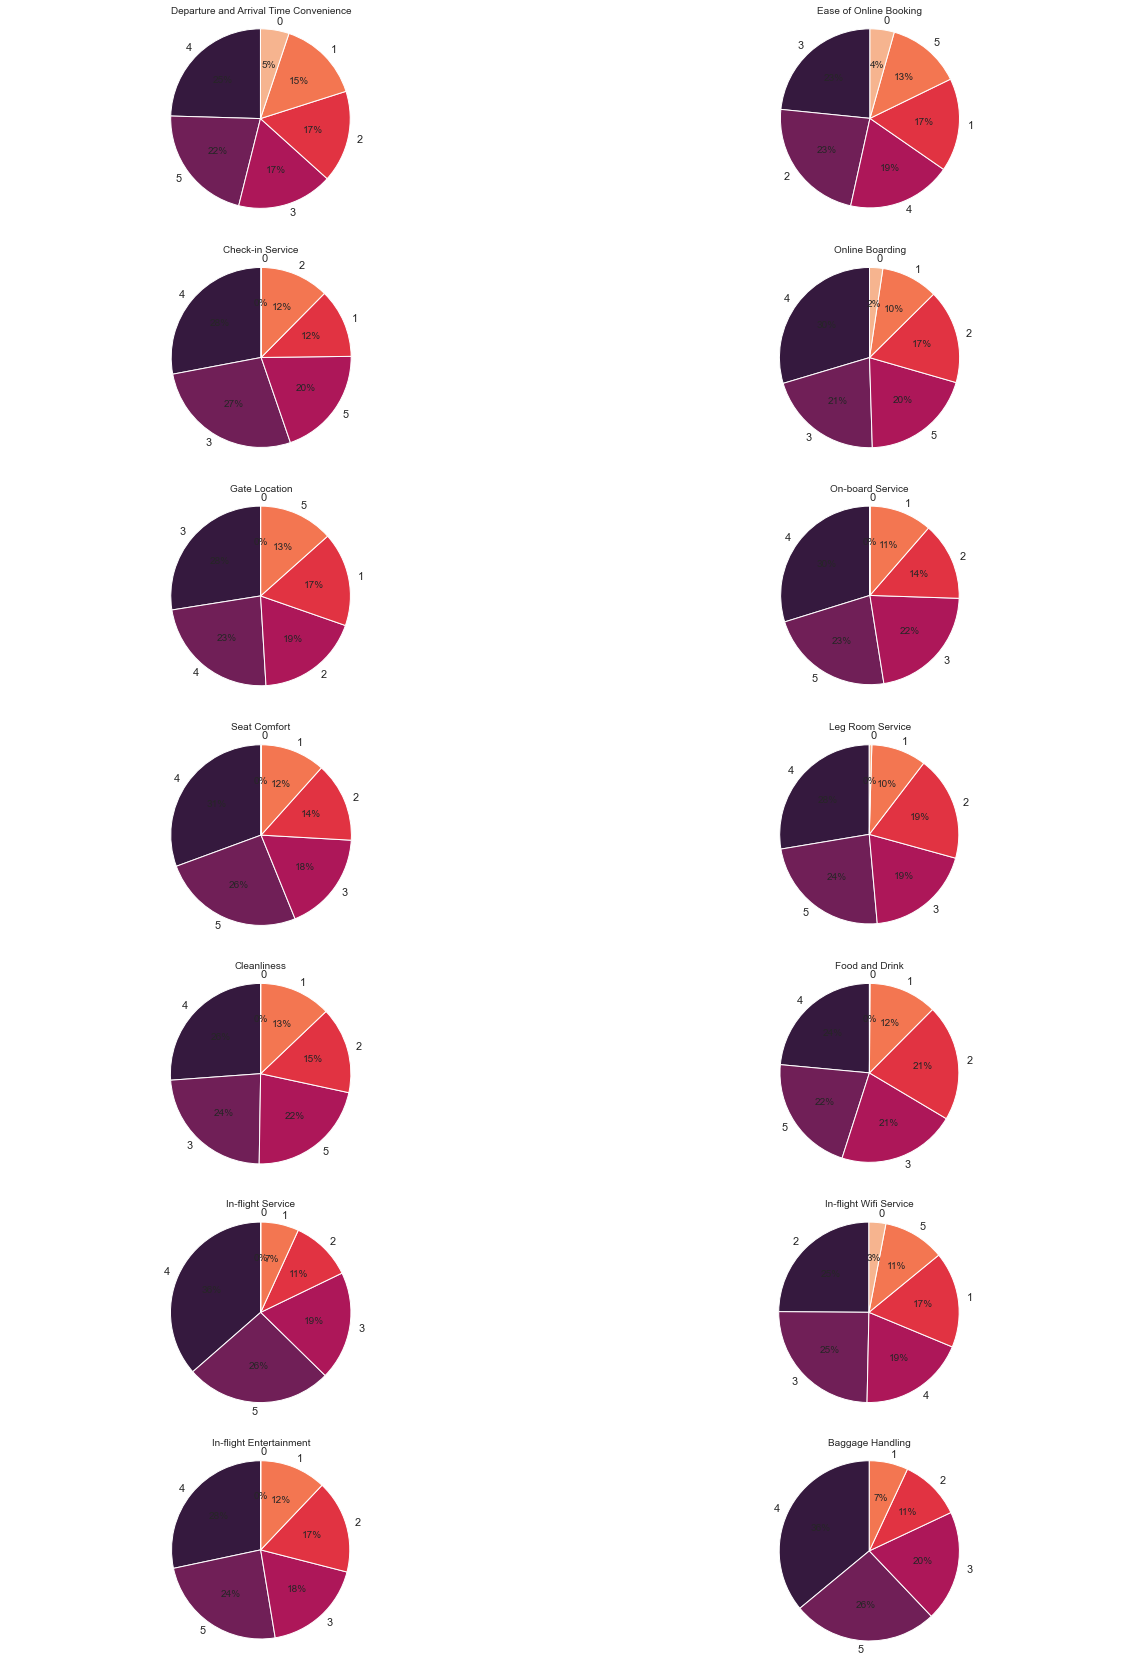

In [84]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(7, 2, figsize = (20, 30))
for i, col in enumerate(non_continues):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("rocket"),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

**Observation:**
- More than 50% (53%) of passengers are satisfied with the On-board Service (rated 4–5 out of 5)
- More than 50% (57%) passengers feel comfortable sitting in their seats (rated 4–5 out of 5)
- More than 50% (52%) of passengers feel comfortable with the distance between seats on the plane (rated 4–5 out of 5)
- More than 60% (62%) of passengers are satisfied with the In-flight Service (rated 4–5 out of 5)
- More than 50% (52%) of passengers are satisfied with the entertainment provided during the flight (rated 4–5 out of 5)
- More than 60% (62%) of passengers are satisfied with passenger baggage handling (rated 4–5 out of 5)

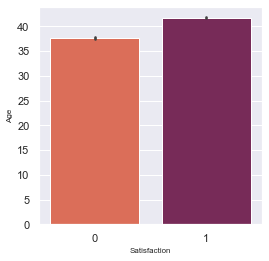

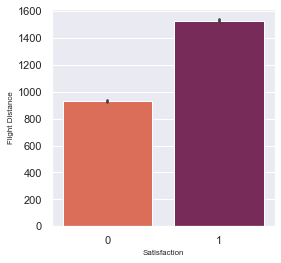

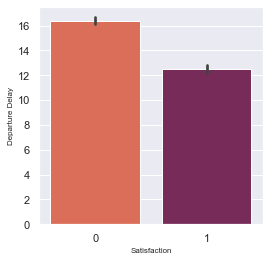

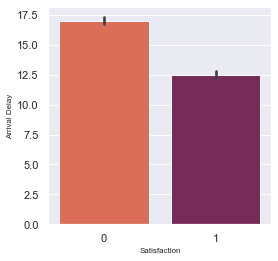

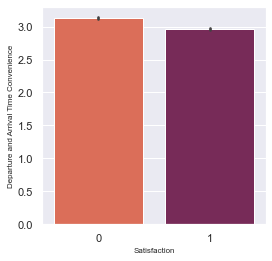

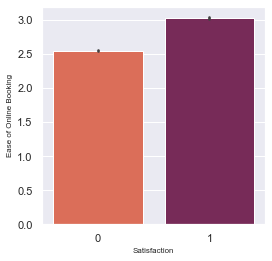

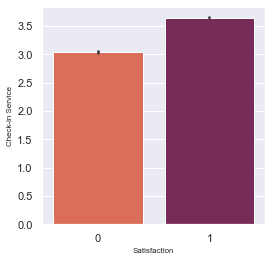

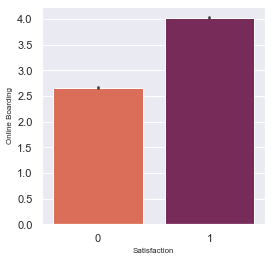

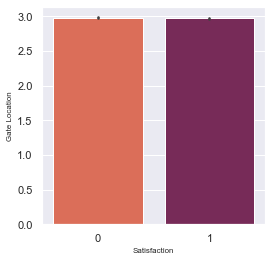

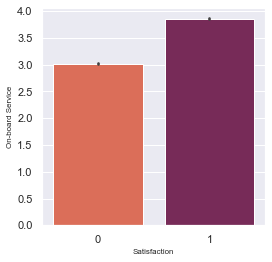

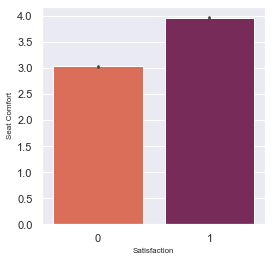

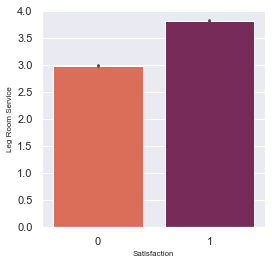

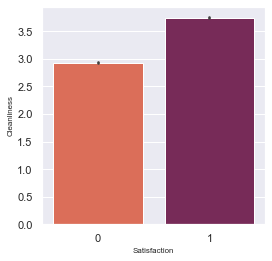

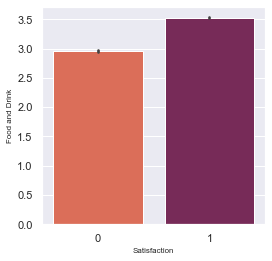

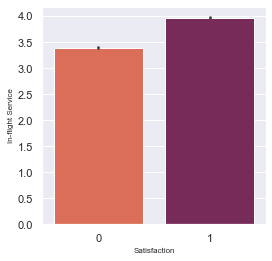

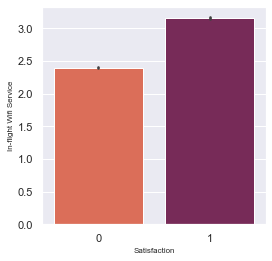

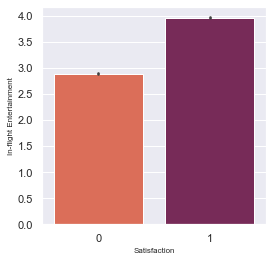

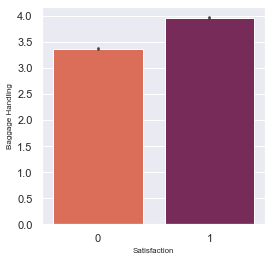

In [78]:
#Plotting the barplot of numerical features
sns.set(rc={'figure.figsize':(4, 4),
            "font.size":8,
            "axes.titlesize":8,
            "axes.labelsize":8},
             style="darkgrid")
for i in numerical:
    sns.barplot(data=df, x='Satisfaction', y=i, palette='rocket_r')
    plt.show()

**Observation:**

- From the graph above, it is known that the location of the Gate does not play a major role in passenger satisfaction.

Then we can ignore that column

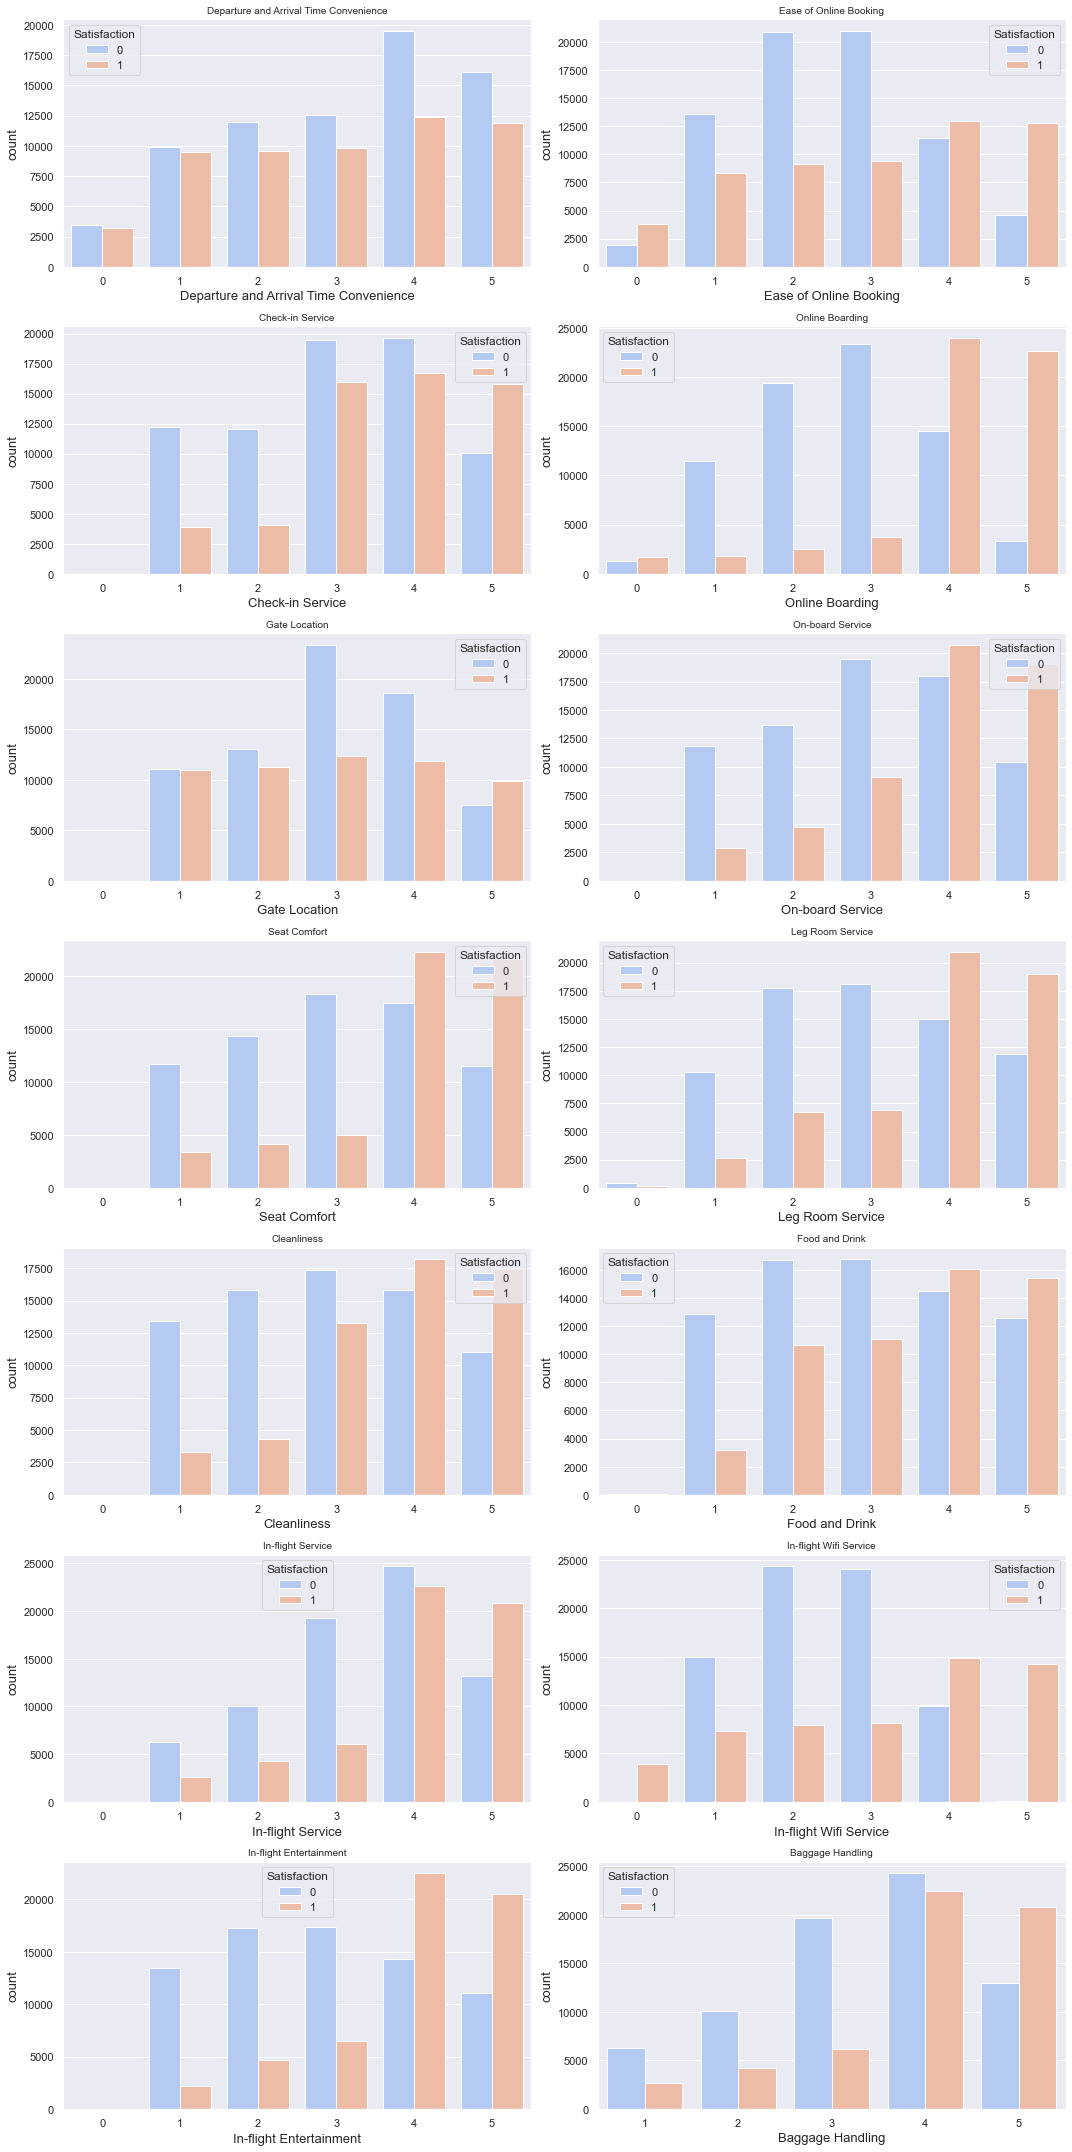

In [80]:
plt.figure(figsize=(15,30))
for i in range(len(non_continues)):
    plt.subplot(7,2,i+1)
    plt.title(non_continues[i])
    sns.countplot(x=df[non_continues[i]],hue=df['Satisfaction'], palette = 'coolwarm')    
plt.tight_layout()

### Using Countplot for Categorical Column

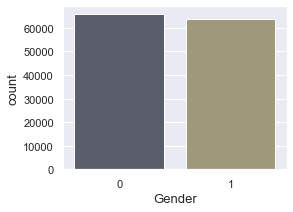

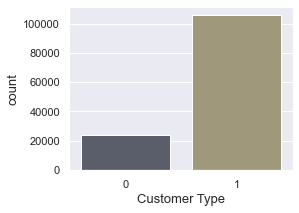

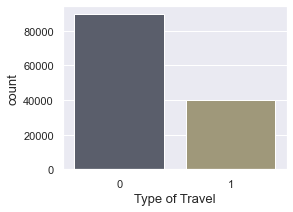

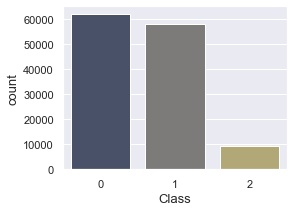

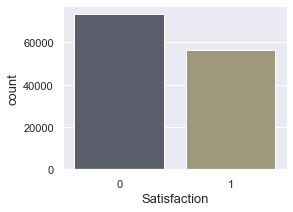

In [81]:
for col in categorical:
    plt.figure(figsize = (4, 3))
    sns.countplot(x = col, data = df, palette = "cividis")
    plt.show();

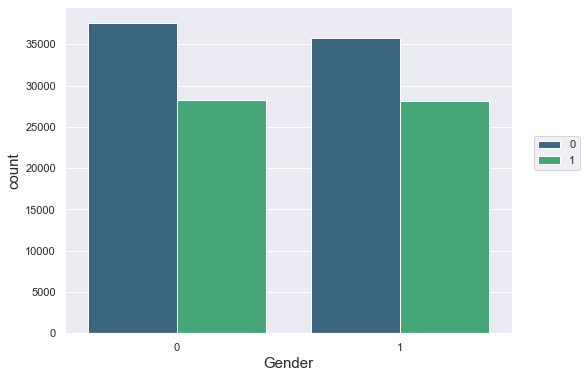

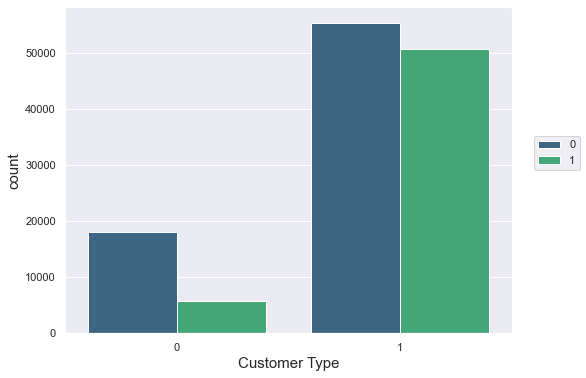

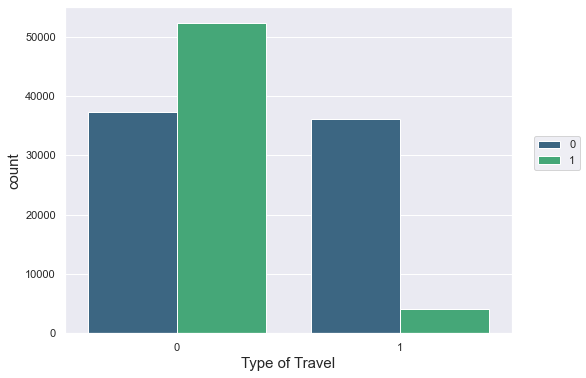

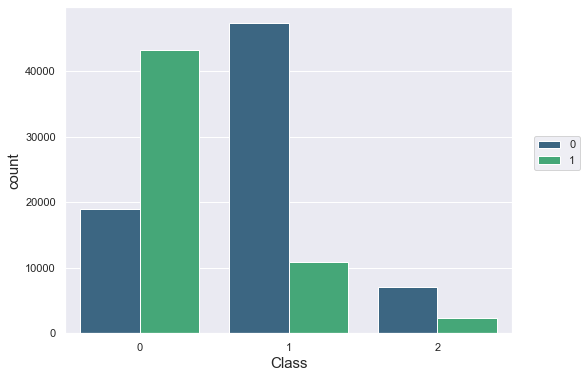

In [82]:
sns.set(rc={'figure.figsize':(8, 8),
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":15},
             style="darkgrid",
            )

for col in categorical[:-1]:
    plt.figure(figsize=(8, 6)) 
    sns.countplot(data=df, x=col, hue ='Satisfaction', palette='viridis')
    plt.legend(loc=(1.05, 0.5))

**Observations:**

- Gender does not play a significant role in satisfaction, as men and women seem to be concerned about the same factors.
- The number of loyal customers for the airline is high, but the dissatisfaction rate is high regardless of loyalty. Airlines must pay attention to retaining loyal customers.
- Travelers with business travel intentions appear to be more satisfied with flights, than travelers with personal travel intentions.
- Passengers in business class seem to be the most satisfied, while passengers in economy class are the most dissatisfied.

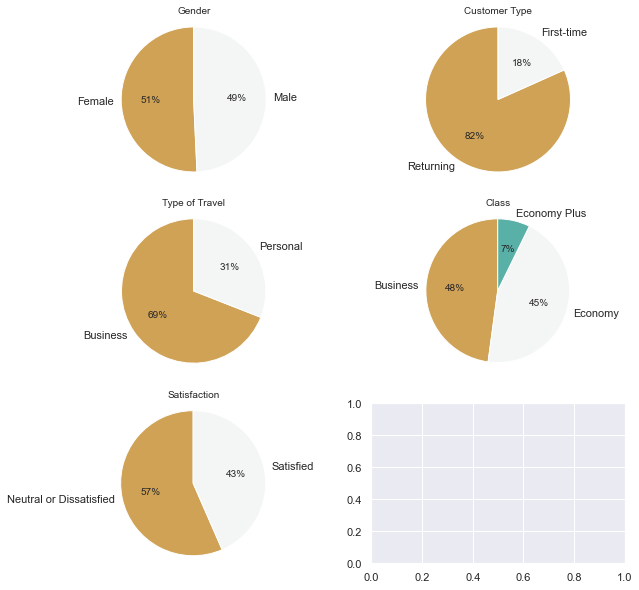

In [29]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
fig, axes = plt.subplots(3, 2, figsize = (10, 10))
for i, col in enumerate(categorical):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//2, i%2].pie(sizes,labels = labels, colors = sns.color_palette("BrBG", 3),autopct = '%1.0f%%', startangle = 90)
    axes[i//2, i%2].axis('equal')
    axes[i//2, i%2].set_title(col)
plt.show()

**Observations:**

- The number of passengers who are female is more dominant than male, but the ratio between males and females in this dataset is more or less the same.
- Most airline passengers are passengers who have used the airline several times (loyal(returning) passengers).
- Most passengers fly for business reasons rather than personal reasons.
- About half of the passengers are in business class.
- Nearly 60% of passengers feel neutral or dissatisfied from satisfied passengers (the number of neutral or dissatisfied passengers is greater than satisfied passengers).

## EDA Question

1. What is the level of airline passenger satisfaction based on Departure Delay and Arrival Delay?
2. What is the level of airline passenger satisfaction when viewed based on Flight Distance and Departure Delay?
3. What is the demographics of airline passengers in terms of age and type of trips taken by passengers?
4. What is the demographics of airline passengers when viewed based on age and class used by passengers when using the airline?
5. What is the level of airline passenger satisfaction when viewed based on Flight Distance?

### 1. Departure Delay & Arrival Delay:

In [30]:
df.groupby('Satisfaction')['Departure Delay'].mean()

Satisfaction
Neutral or Dissatisfied    16.406837
Satisfied                  12.509782
Name: Departure Delay, dtype: float64

In [31]:
df.groupby('Satisfaction')['Arrival Delay'].mean()

Satisfaction
Neutral or Dissatisfied    17.003281
Satisfied                  12.496987
Name: Arrival Delay, dtype: float64

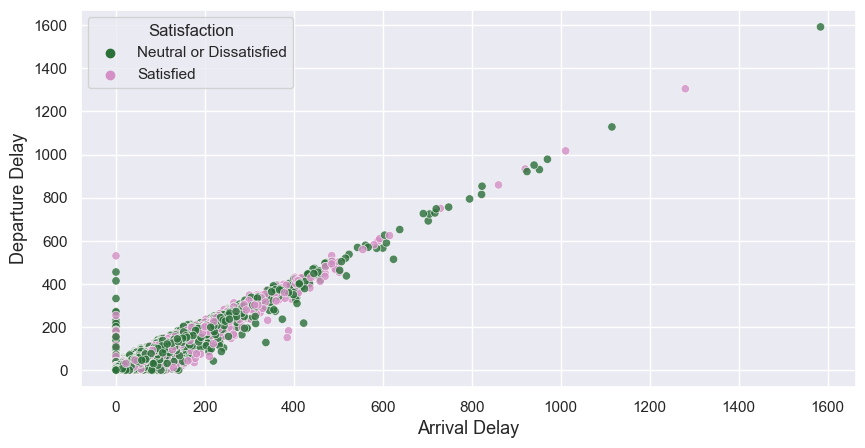

In [32]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10, 5), dpi=100)
sns.scatterplot(data=df, x='Arrival Delay', y='Departure Delay', hue='Satisfaction', palette='cubehelix', alpha=0.8);

**Observations:**

- Departure and arrival delays seem to have a linear relationship.
- There was 1 passenger who was satisfied even after a delay of 1300 minutes.

### 2. Flight Distance & Departure Delay:

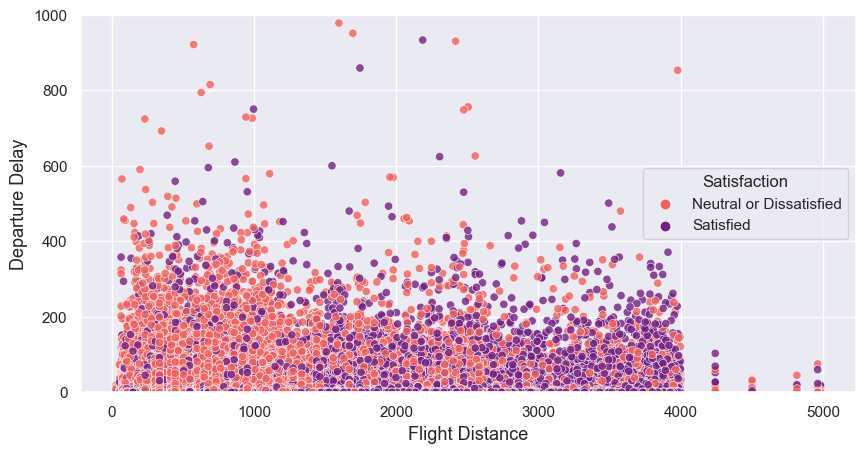

In [33]:
sns.set(rc={
            "font.size":10,
            "axes.titlesize":10,
            "axes.labelsize":13},
             style="darkgrid")
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay', hue='Satisfaction', palette='magma_r', alpha=0.8)
plt.ylim(0,1000);

**Observations:**

- It turns out that the longer the flight, the majority of passengers feel fine with the slight delay in departure.
- Meanwhile, in comparison, departure delays are not a factor for long-distance flights. However, travelers with short flight distances seem unhappy with the delayed departure.

### 3. Age & Customer Type:

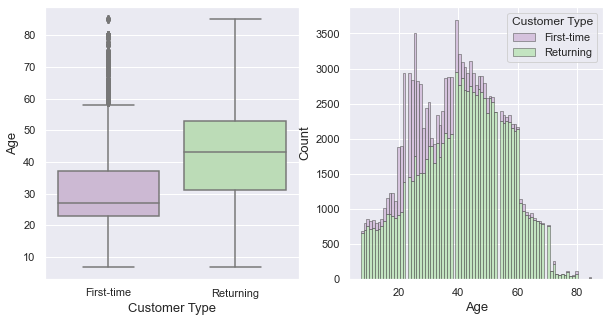

In [34]:
f, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "PRGn", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "PRGn", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**

- From the above data it can be concluded that most of the airline's regular passengers are aged between 30 and 50 years (the average age of passengers is slightly over 40 years).
- Whereas the age range for non-regular passengers (those who use the airline for the first time) is slightly younger, aged between 20 to 40 years (the average age of passengers is slightly less than 30 years).

### 4. Age & Class:

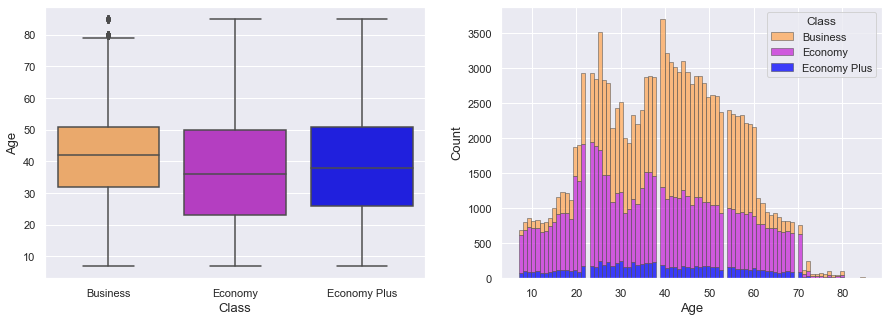

In [35]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
sns.boxplot(x = "Class", y = "Age", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**

- It can be seen that the average age range of passengers traveling in business class is the same (based on the previous box chart) with the age range of regular passengers. Based on these observations, it can be assumed that regular customers generally buy business class for themselves.

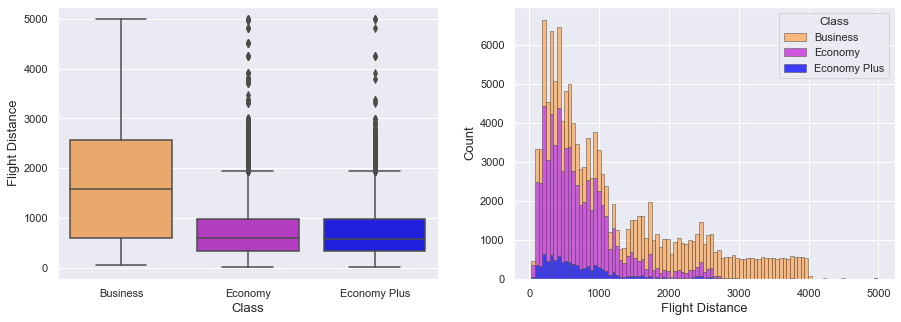

In [36]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "gnuplot2_r", edgecolor = ".3", 
             linewidth = .5, ax = ax[1]);

**Observations:**

- Most of passenger with the long distance flight using Business Class

### 5. Flight Distance:

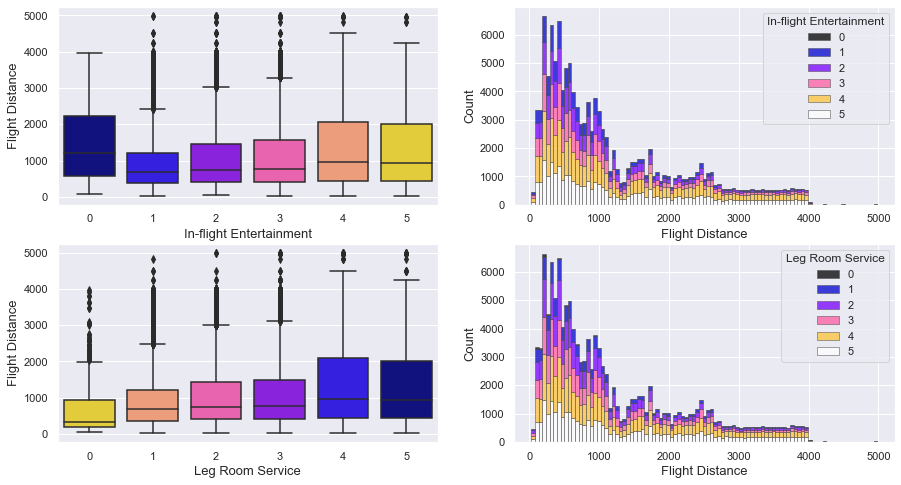

In [37]:
f, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x = "In-flight Entertainment", y = "Flight Distance", palette = "gnuplot2", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "In-flight Entertainment", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg Room Service", y = "Flight Distance", palette = "gnuplot2_r", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg Room Service", multiple = "stack", palette = "gnuplot2", 
             edgecolor = ".3", linewidth = .5, ax = ax[1, 1]);

**Observations:**

- The farther the flight distance traveled by airplane passengers, the longer the passengers will be on the flight.
- So that passengers feel more satisfied with the entertainment during the flight and the extra distance between seats on the plane (leg room) (on average).

## Summary of Exploratory Data Analysis :

- Gender does not play a significant role in satisfaction, as men and women seem to be equally concerned with the same factors.
- The number of loyal customers for the airline is high, but the level of dissatisfaction is high regardless of loyalty. Airlines must pay attention to retaining loyal customers
- Travelers with business goals seem to be more satisfied with flights, than travelers with personal goals.
- People in business class seem the most satisfied and passengers in economy class seem the most dissatisfied.
- The longer the flight, but most of the passengers are okay with the slight delay in departure, which is an odd finding of this plot!
- Departure delay is not a factor for long haul flights. However, travelers with short flight distances seem to be unhappy with the delay in departure.
- Most of the airline's regular passengers are between 30 and 50 years old (the average passenger age is slightly over 40 years).
- The age range of non-regular passengers is slightly younger between 20 and 40 years old (the average passenger age is slightly less than 30 years).
- Passengers flying long distances mostly fly business class.
- The farther the distance traveled by airplane passengers, the longer the passengers will be on the flight, so that the passengers will be more satisfied with the in-flight entertainment and the extra distance between seats on the plane.

## Multivariate Analysis

### Using Pearson's Correlation for Drawing Heatmap:

### Correlation Heatmap for Numeric Column

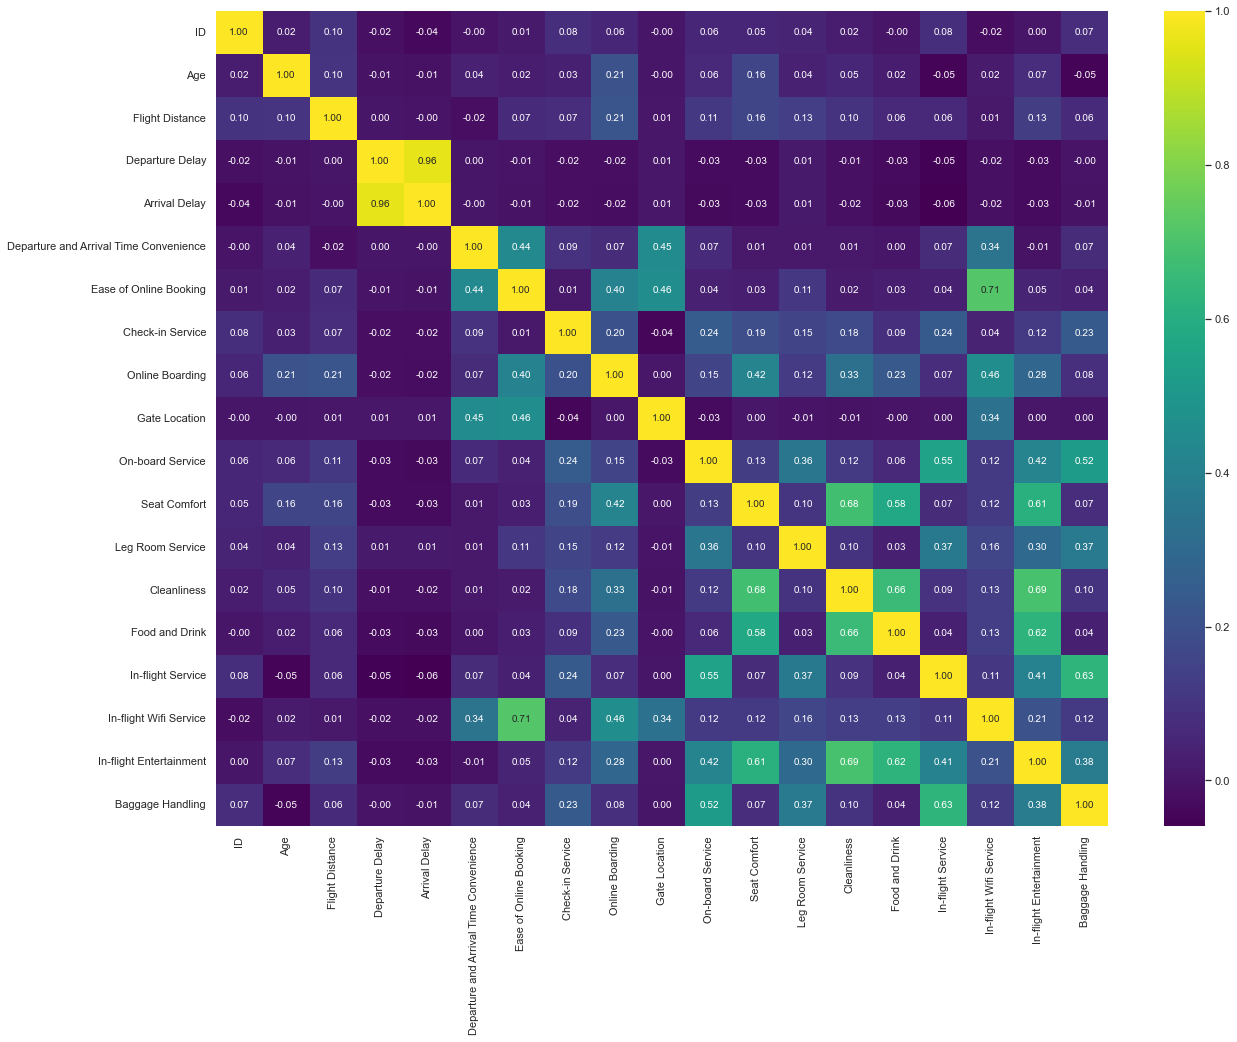

In [38]:
correlation = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'viridis');

From the result of the Heatmap we can show :

- Has 2 features, namely Departure Delay and Arrival Delay which are highly correlated with each other. This means that it contains redundant information, while for modeling you can only choose 1 of the 2 variables.

How to Read the Heatmap:

For example, the number 0.97 in Departure Delay interprets that the linear correlation between Departure Delay and Arrival Delay is strong because it is close to 1, and because the sign is positive, the relationship is strong and harmonious, the higher the Departure Delay, the higher the Arrival Delay (unidirectional). Contextually, this means that the longer the Departure Delay, the longer the Arrival Delay.

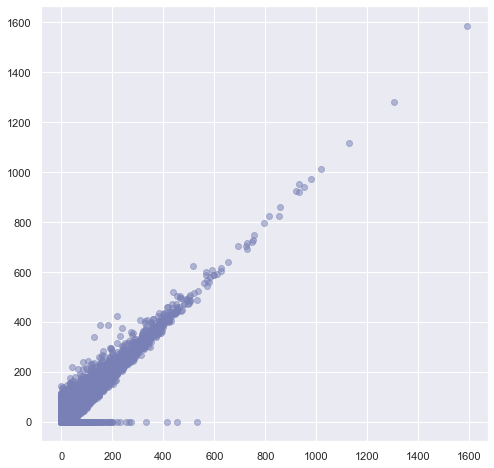

In [39]:
plt.scatter(df['Departure Delay'], df['Arrival Delay'], alpha = 0.5, color = '#7880b5')
pass;

As can be seen from the Scatterplot results above, the points line up more or less along a straight line from the bottom left corner to the top right. Thus, it is estimated that the length of delay in arrival depends on the length of delay in departure which is linear.

So if the airline passenger's flight time is delayed for a certain time at departure, then the flight time will also be delayed by the same amount of time at landing (provided the plane does not accelerate during the flight to make up for wasted time and also as long as there are no other technical constraints that hinder time flights, such as holding in the air while waiting for an order to land from the control tower (pilot waiting for a signal from ATC), or due to weather factors).

**EXPLANATION:** The reasons for the correlation between departure delays and arrival delays are so high, including:

- Departure delays and arrival delays are highly correlated because both are closely related events in the flight process. Departure on departure times can cause a chain of events that impact the remaining flights, including arrival times. Delayed departures can result in missed connecting flights for transiting passengers, changes to flight routes, and additional waiting times at connecting airports, all of which can result in delayed arrivals.
- In addition, many causes of delays in departures also cause delays in arrivals. For example, adverse weather conditions can impact flight departure and arrival times, and problems with aircraft or flight crew can result in delayed departures and delayed arrivals.
- In summary, the high correlation between departure delays and arrival delays is due to the close relationship between the two events and the impact of departure delays on the remaining flights.

**Question:** Is it possible if the departure time is on time but the arrival time is delayed?

There is a possibility that the flight departure is on time but the arrival is late, several reasons include:

- In-flight problems: Unforeseen problems such as mechanical problems, medical emergencies or weather conditions may arise during the flight and cause a delay in arrival time.
- Air Traffic Controller (ATC): Air traffic controllers who impose restrictions on pilots, such as holding patterns in the air when landing at the destination airport, which can affect flight arrival times even though the departure is on time.
- Re-routing: Flights may be diverted mid-flight due to weather or other operational reasons, causing delays to arrival times.
- Missed connecting flight (transit): If a connecting flight is delayed, this can impact the arrival time of the next flight, even if the original flight left on time.

**Summary:** Delayed arrival times can occur despite an on-time departure for a variety of reasons that may affect the flight during its journey.

### Dependent Variable or Feature:

In [40]:
df["Satisfaction"].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

### Check Dependent Variable is Balanced or Not:

In [41]:
round(df["Satisfaction"].value_counts()[1]/(df["Satisfaction"].value_counts()[0]+df["Satisfaction"].value_counts()[1])*100,2)

43.45

In [42]:
target = df['Satisfaction'].value_counts().reset_index()
target.rename(columns={'index':'Satisfaction','Satisfaction':'freq'}, inplace=True)
target['percentage'] = round((target['freq']/target['freq'].sum())*100,2)
target

,Satisfaction,freq,percentage
0,Neutral or Dissatisfied,73452,56.55
1,Satisfied,56428,43.45


In this case it is a matter of class 0 or 1 binary classification which indicates passenger satisfaction, Class 1 only has a total value of 43.45%. In theory it is out of balance, but the numbers are still tolerable. Therefore it does not require Imbalanced Data handling to overcome this.

### EDA on Feature Satisfaction:

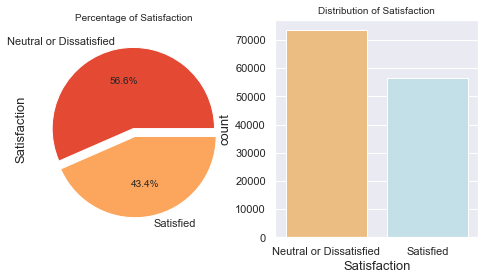

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4))
df['Satisfaction'].value_counts().plot.pie(explode=[0,0.1],colors = sns.color_palette("RdYlBu"),autopct='%1.1f%%',ax=ax1)
ax1.set_title('Percentage of Satisfaction')
sns.countplot(x='Satisfaction',data=df,ax=ax2,palette='RdYlBu')
ax2.set_title('Distribution of Satisfaction')
plt.show();

**Observations:**

- According to the data provided, 56.6% of passengers felt neutral or dissatisfied
- And the remaining 43.4% of passengers are satisfied.

## Data Preprocessing and Feature Engineering:

### Handling Categorical Column (Encoding)

In [44]:
def categoricals_unique(data):
    for column in data:
        if data[column].dtypes == 'object':
            print(f'{column} : {data[column].unique()}')

In [45]:
categoricals_unique(df)

Gender : ['Male' 'Female']
Customer Type : ['First-time' 'Returning']
Type of Travel : ['Business' 'Personal']
Class : ['Business' 'Economy' 'Economy Plus']
Satisfaction : ['Neutral or Dissatisfied' 'Satisfied']


Note:

- Categorical Column Encoding which has 2 unique values such as: **Male** and **Female**, **First-time** and **Returning**, **Business** and **Personal**, * *Neutral or Dissatisfied** and **Satisfied** represented by **1** and **0**:
- While the Categorical Column Encoding which has 3 unique values as in the Class column which has unique values **Business**, **Economy** and **Economy Plus** are represented by **0**,**1**, and **2**.

In [46]:
for i in df.columns:
    if df[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df[i]=label_encoder.fit_transform(df[i])

In [47]:
df['Class'].unique()

array([0, 1, 2])

In [48]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,1


Note:

1. Gender Column:
- 1: Male (Laki-laki)
- 0: Female (Perempuan)
2. Customer Type Column:
- 0: First-time
- 1: Returning
3. Type of Travel Column:
- 0: Business
- 1: Personal
4. Class Column:
- 0: Business
- 1: Economy
- 2: Economy Plus
5. Satisfaction Column:
- 0: Neutral or Dissatisfied
- 1: Satisfied

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  int32  
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  int32  
 4   Type of Travel                          129880 non-null  int32  
 5   Class                                   129880 non-null  int32  
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129880 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

## Split Data: Training-Testing

In [50]:
feature = df.drop(columns = 'Satisfaction')
target = df[['Satisfaction']]

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.20, random_state = 42)

In [51]:
feature_train.shape

(103904, 23)

## Lazy Predict:

Lazy Predict is a Python library designed to compare the performance of different machine learning models on data sets. Using Lazy Predict as a basis for comparing which model works best on this dataset so as to get a Machine Learning model with the best accuracy.

In [52]:
from lazypredict.Supervised import LazyClassifier

In [53]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(feature_train, feature_test, target_train, target_test)
models

 90%|████████▉ | 26/29 [26:11<05:30, 110.27s/it]

[14:20:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


100%|██████████| 29/29 [26:26<00:00, 54.70s/it] 


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.97,0.96,0.96,0.97,13.31
LGBMClassifier,0.97,0.96,0.96,0.96,1.44
RandomForestClassifier,0.96,0.96,0.96,0.96,13.69
ExtraTreesClassifier,0.96,0.96,0.96,0.96,10.07
BaggingClassifier,0.96,0.96,0.96,0.96,5.94
SVC,0.96,0.95,0.95,0.96,302.39
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.86
KNeighborsClassifier,0.93,0.93,0.93,0.93,60.43
AdaBoostClassifier,0.93,0.92,0.92,0.93,5.50


At this stage, we didn't know how to choose an algorithm when training a Machine Learning model, so we decided to use the Lazy Predict library in Python to compare the performance of different Machine Learning models based on classification.

From the results above, the performance of all classification models is ranked based on their performance. From these results, the top 3 models with the best performance results will be taken for the Machine Learning model in this dataset.
The three models include:

1. LGBMClassifier
2. XGBClassifier
3. RandomForestClassifier

## 1. LGBMClassifier:

In [54]:
import lightgbm as lgb

In [55]:
classification = lgb.LGBMClassifier()
classification.fit(feature_train, target_train)

LGBMClassifier()

### Model Prediction

In [56]:
# predict the results
target_pred = classification.predict(feature_test)

### Show The Accuracy Model:

In [57]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(target_pred, target_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred)))

LightGBM Model accuracy score: 0.9645


In this case, target_test is the actual class label and target_pred is the predicted class label in the test set.

### Comparing Between Train dan Test set Accuracy:

We will now compare the accuracy of the train-set and test-set to check for overfitting.

In [58]:
target_pred_train = classification.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train)))

Training-set accuracy score: 0.9676


### Check Overfitting:

In [59]:
print('Training set score: {:.4f}'.format(classification.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(classification.score(feature_test, target_test)))

Training set score: 0.9676
Test set score: 0.9645


The accuracy between the training set and the test is quite comparable. So, can't say there is overfitting.

### Confusion Matrix:

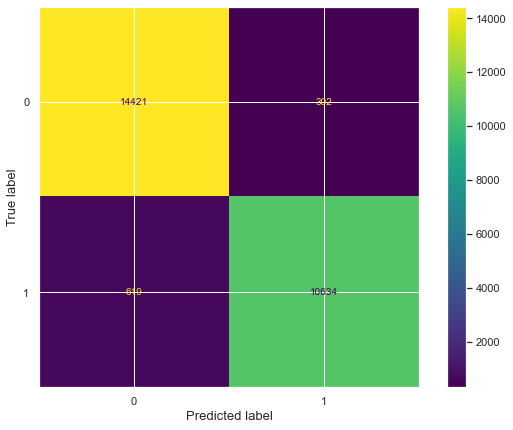

In [60]:
# Matrix confusion:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))

cm = confusion_matrix(target_test, target_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                             
disp.plot(ax=ax)
plt.show()

- A total of 274 data (passengers) predicted 1 (Satisfied) turned out to be actually dissatisfied or neutral (0).

### Classification Metrics:

In [61]:
from sklearn.metrics import classification_report
print(classification_report(target_test, target_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14723
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



TIP: Just focus on row '1'. <br>
Findings: The model is very good (satisfactory). The recall score on the test data is high, namely 0.94.

**Conclusion:**
Because the performance on the train data is good, the model does not experience overfitting.

## 2. XGBClassifier:

In [62]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [63]:
xgb = XGBClassifier(n_estimators=100)
xgb.fit(feature_train, target_train)

[14:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Model Prediction

In [64]:
# predict the results
target_pred1 = xgb.predict(feature_test)

### Show The Accuracy Model

In [65]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(target_pred1, target_test)
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(target_test, target_pred1)))

XGBClassifier Model accuracy score: 0.9651


### Coimpare Between Train dan Test set Accuracy:

In [66]:
target_pred_train1 = xgb.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train1)))

Training-set accuracy score: 0.9772


In [67]:
#import the model

from xgboost import XGBClassifier

#fit the model
xgb = XGBClassifier()
xgb.fit(feature_train, target_train)

# prediction
pred_train = xgb.predict(feature_train)

# model name
model_name = str(type(xgb)).split(".")[-1][0:-2]
print(f"\t\t{model_name.upper()} MODEL\n")

print('Training part:')
print(classification_report(target_train, pred_train,
                                    target_names=['Neutral or Dissatisfied', 'Satisfied']))

print("Accuracy score for training dataset",accuracy_score(target_train, pred_train))

[14:20:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
		XGBCLASSIFIER MODEL

Training part:
                         precision    recall  f1-score   support

Neutral or Dissatisfied       0.97      0.99      0.98     58729
              Satisfied       0.98      0.96      0.97     45175

               accuracy                           0.98    103904
              macro avg       0.98      0.98      0.98    103904
           weighted avg       0.98      0.98      0.98    103904

Accuracy score for training dataset 0.9772482291345858


### Check Overfitting

In [68]:
print('Training set score: {:.4f}'.format(xgb.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(xgb.score(feature_test, target_test)))

Training set score: 0.9772
Test set score: 0.9651


The accuracy between the training set and the test is quite comparable. So, can't say there is overfitting.

## 3. RandomForestClassifier:

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
feature_train.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [71]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(feature_train, target_train)

RandomForestClassifier(random_state=0)

In [72]:
rfc.score(feature_test, target_test)

0.9638897443794272

### Model Prediction:

In [73]:
# predict the results
target_pred2 = rfc.predict(feature_test)

### Show The Accuracy Model

In [74]:
from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(target_pred2, target_test)
print('RandomForestClassifier Model accuracy score : {0:0.4f}'. format(accuracy_score(target_test, target_pred2)))

RandomForestClassifier Model accuracy score : 0.9639


### Compare Between Train and Test Accuracy:

In [75]:
target_pred_train2 = rfc.predict(feature_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(target_train, target_pred_train2)))

Training-set accuracy score: 1.0000


### Check Overfitting:

In [76]:
print('Training set score: {:.4f}'.format(rfc.score(feature_train, target_train)))
print('Test set score: {:.4f}'.format(rfc.score(feature_test, target_test)))

Training set score: 1.0000
Test set score: 0.9639


Accuracy between training set and test is fairly comparable when rounded up. So, can't say there is overfitting.

**Observations:** According to the results from Lazy Predict, the top 3 models selected have good accuracy and no overfitting has been detected.

Among these 3 models, the number with the most comparable test accuracy results is the **LGBMClassifier** model.